## Exercise: Perform EDA on Haberman dataset

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data.     (https://www.kaggle.com/gilsousa/habermans-survival-data-set)

2. Perform a similar alanlaysis as above on this dataset with the following sections:

3. High level statistics of the dataset: number of points, numer of features, number of classes, data-points per  
   class.
  
4. Explain our objective.

5. Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards  
   classification.

6. Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in 
   classfication.
  
7. Write your observations in english as crisply and unambigously as possible. Always quantify your results.


### Ques 1- 2 download and read the dataset.


In [119]:
#import the library numpy ,pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read the CSV dataset
dataset = pd.read_csv("haberman.csv")
#get the no. of row and column
dataset.shape

(306, 4)

### Ques 3 High level statistics of the dataset:


### § number of points

In [120]:
dataset.shape

(306, 4)

Observation:
we can see that total no of column = 4 and row = 306 , i.e. total instance of data point 306 and total feature 4.

### § number of features

In [121]:
dataset.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

### Observation:
    There are 4 attribute in this data set out of which 3 are features ,i.e. 'age', 'year' and 'nodes' 
    and 1 class attribute i.e. 'status'.
1. Column #1 : age of the cancer patient.
2. Column #2 : Year of operation.
3. Column #3 : No. of positive axillary nodes detected.
4. Column #4 : status of the patient : 1 : survived > 5 year , 2: survived < 5 year.

### § number of classes,data-points per class.

In [122]:
#mapping status = 1 with 'survived > 5' and  2 with 'survived < 5'
dataset['status']  = dataset['status'].map({1:'survived > 5' , 2: 'survived < 5'} )
dataset['status'].value_counts()

survived > 5    225
survived < 5     81
Name: status, dtype: int64

### Observation:
    There are two classes:
    º class1 : survived > 5 , total data point 225 i.e 73.5%.
    º class2 : survived < 5 , total data point 81 i.e 26.5%.
    So this is an imbalanced dataset.

## Ques 4 Explain our objective.

### Observation:
    This dataset belongs to the patients who had undergone surgery for breast cancer.
    We have to classify the dataset into two classes :
    a. no of patients survived more than 5 years after operation.
    b. no of patients survived less than 5 years after operation.
    based on 3 features attribute :
     1 : age of the cancer patient.
     2 : Year of operation.
     3 : No. of positive axillary nodes detected.

## Ques 5 Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.

In [123]:
dataset_survived = dataset.loc[dataset["status"] == 'survived > 5']
dataset_survived.describe()
dataset_died = dataset.loc[dataset["status"] == 'survived < 5']
dataset_survived.describe()

,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [75]:
dataset_died.describe()

,age,year,nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


#### Ø feature analysis: AGE

In [124]:
survived_age = dataset_survived['age'].describe()
died_age = dataset_died['age'].describe()
dataset_age = pd.DataFrame(data={'survived':survived_age,'died':died_age})
dataset_age

,survived,died
count,225.000000,81.000000
mean,52.017778,53.679012
std,11.012154,10.167137
min,30.000000,34.000000
25%,43.000000,46.000000
50%,52.000000,53.000000
75%,60.000000,61.000000
max,77.000000,83.000000


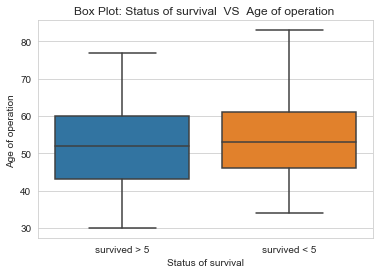

In [125]:
sns.boxplot(x='status',y='age', data=dataset)
plt.ylabel("Age of operation ")
plt.xlabel("Status of survival")
plt.title("Box Plot: Status of survival  VS  Age of operation ")
plt.show()

### Observation:
 #### ∆ status = 1 , i.e. who survived more than 5 year
         upper extreme   : age between 75 and 80.
         third quartile  : age = 60.
         second quartile : age between 50 and 55.
         first quartile  :age between 40 to 45.
         lower extreme   : age = 30.
 ####  ∆ status = 2 , i.e. who survived less than  5 year
         upper extreme : age > 80.
         third quartile : age between 60 and 65.
         second quartile : age between 50 and 55.
         first quartile :age between 42 to 45.
         lower extreme : age between 30 to 35.
         
     ø by comparing status 1 and 2 we can say that age between 30 to 40 , 
       chances of survival is high. Age  > 60, chances of survival is less.

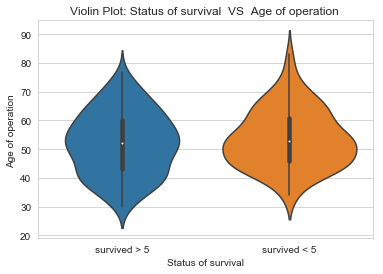

In [126]:
import warnings
warnings.filterwarnings("ignore")
sns.violinplot(x='status',y='age', data=dataset)
plt.ylabel("Age of operation ")
plt.xlabel("Status of survival")
plt.title("Violin Plot: Status of survival  VS  Age of operation ")
plt.show()

### Observation:
    Violin plots are a synergism between box plot and density trace. So all the observation i.e. upper and lower    
    extreme, first , second and third quartile will be same as box plot.

  ####   ∆ density trace observation:
   #####    for plot status = 1 , i.e. who survived more than 5 year:
           age between 45 to 60 are more dense.
  ######    for plot status = 2 , i.e. who survived less than  5 year:
           age between 40 to 52 are more dense.

[0.02222222 0.03111111 0.04444444 0.06222222 0.04444444 0.08
 0.04       0.05333333 0.09777778 0.06666667 0.07555556 0.08888889
 0.04888889 0.04444444 0.08       0.03111111 0.02222222 0.04
 0.01333333 0.01333333]
[30.   32.35 34.7  37.05 39.4  41.75 44.1  46.45 48.8  51.15 53.5  55.85
 58.2  60.55 62.9  65.25 67.6  69.95 72.3  74.65 77.  ]
[0.02469136 0.01234568 0.04938272 0.07407407 0.12345679 0.07407407
 0.07407407 0.12345679 0.09876543 0.03703704 0.03703704 0.08641975
 0.04938272 0.04938272 0.03703704 0.01234568 0.01234568 0.01234568
 0.         0.01234568]
[34.   36.45 38.9  41.35 43.8  46.25 48.7  51.15 53.6  56.05 58.5  60.95
 63.4  65.85 68.3  70.75 73.2  75.65 78.1  80.55 83.  ]


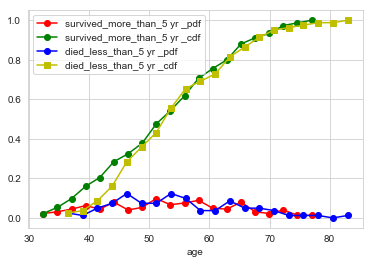

In [127]:
#pdf and cdf

counts, bin_edges = np.histogram(dataset_survived['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,"ro-",label='survived_more_than_5 yr _pdf')
plt.plot(bin_edges[1:], cdf,"go-",label='survived_more_than_5 yr _cdf')


#plt.show();

#pdf and cdf

counts, bin_edges = np.histogram(dataset_died['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,"bo-",label='died_less_than_5 yr _pdf')
plt.plot(bin_edges[1:], cdf,"ys-",label='died_less_than_5 yr _cdf')
plt.legend()
plt.xlabel("age")

plt.show();

### Observation:
  ####  PDF and CDF for survived and died dataset are almost same. So to predict status of the patient using age feature is difficult.

#### Ø feature analysis : year


In [128]:
survived_year = dataset_survived['year'].describe()
died_year = dataset_died['year'].describe()
dataset_year = pd.DataFrame(data={'survived':survived_year,'died':died_year})
dataset_year

,survived,died
count,225.000000,81.000000
mean,62.862222,62.827160
std,3.222915,3.342118
min,58.000000,58.000000
25%,60.000000,59.000000
50%,63.000000,63.000000
75%,66.000000,65.000000
max,69.000000,69.000000


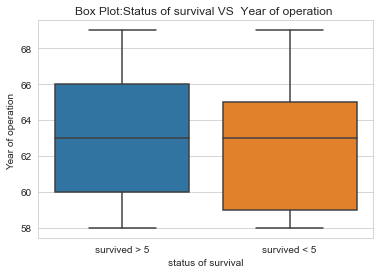

In [130]:
sns.boxplot(x='status',y='year', data=dataset)
plt.ylabel("Year of operation ")
plt.xlabel("status of survival")
plt.title("Box Plot:Status of survival VS  Year of operation ")
plt.show()

### Observation:
 #### ∆ status = 1 , i.e. who survived more than 5 year:
         upper extreme   : year of operation > 68.
         third quartile  : year of operation = 66.
         second quartile : year of operation between (62 and 64).
         first quartile  : year of operation = 60.
         lower extreme   : year of operation = 58.

 #### ∆status = 2 , i.e. who survived less than  5 year:
         upper extreme   : year of operation > 68.
         third quartile  : year of operation between (64 and 66).
         second quartile : year of operation between (62 and 64).
         first quartile  : year of operation between (58 and 60).
         lower extreme   : year of operation = 58.

      ø by comparing status 1 and 2 we can say that Patient who operated between year 65 to 66 ,chances of survival           is high.

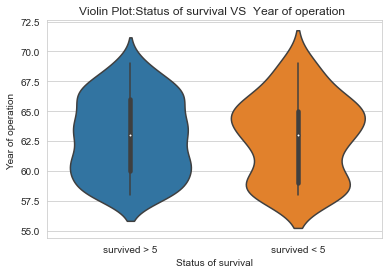

In [131]:
sns.violinplot(x='status',y='year', data=dataset)
plt.ylabel("Year of operation ")
plt.xlabel("Status of survival")
plt.title("Violin Plot:Status of survival VS  Year of operation ")
plt.show()


### Observation:
    Violin plots are a synergism between box plot and density trace. So all the observation i.e. upper and lower    
    extreme, first , second and third quartile will be same as box plot.

  ####   ∆ density trace observation:
   #####    for plot status = 1 , i.e. who survived more than 5 year:
           Patient who operated between year 58 to 62 are more dense.
  ######    for plot status = 2 , i.e. who survived less than  5 year:
           Patient who operated between year 60 to 65.5 are more dense.


[0.10666667 0.08       0.         0.10666667 0.         0.10222222
 0.         0.07111111 0.         0.09777778 0.10222222 0.
 0.06666667 0.         0.09777778 0.         0.09333333 0.
 0.04444444 0.03111111]
[58.   58.55 59.1  59.65 60.2  60.75 61.3  61.85 62.4  62.95 63.5  64.05
 64.6  65.15 65.7  66.25 66.8  67.35 67.9  68.45 69.  ]
[0.14814815 0.11111111 0.         0.04938272 0.         0.03703704
 0.         0.08641975 0.         0.09876543 0.09876543 0.
 0.16049383 0.         0.07407407 0.         0.04938272 0.
 0.03703704 0.04938272]
[58.   58.55 59.1  59.65 60.2  60.75 61.3  61.85 62.4  62.95 63.5  64.05
 64.6  65.15 65.7  66.25 66.8  67.35 67.9  68.45 69.  ]


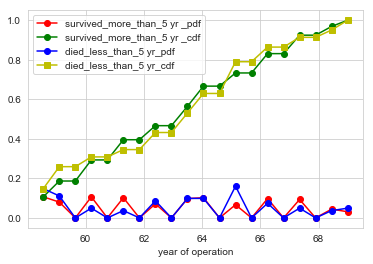

In [133]:
counts, bin_edges = np.histogram(dataset_survived['year'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,"ro-",label='survived_more_than_5 yr _pdf')
plt.plot(bin_edges[1:], cdf,"go-",label='survived_more_than_5 yr _cdf')


#plt.show();

#pdf and cdf

counts, bin_edges = np.histogram(dataset_died['year'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,"bo-",label='died_less_than_5 yr_pdf')
plt.plot(bin_edges[1:], cdf,"ys-",label='died_less_than_5 yr_cdf')
plt.legend()
plt.xlabel("year of operation")

plt.show();

### Observation:
     PDF and CDF for survived and died dataset are almost same. So to predict status of the patient using year     
     feature is difficult.

#### Ø feature analysis: node

In [134]:
survived_nodes = dataset_survived['nodes'].describe()
died_nodes = dataset_died['nodes'].describe()
dataset_nodes = pd.DataFrame(data={'survived':survived_nodes,'died':died_nodes})
dataset_nodes

,survived,died
count,225.000000,81.000000
mean,2.791111,7.456790
std,5.870318,9.185654
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,4.000000
75%,3.000000,11.000000
max,46.000000,52.000000


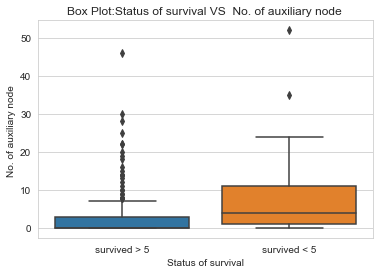

In [135]:
sns.boxplot(x='status',y='nodes', data=dataset)
plt.ylabel("No. of auxiliary node ")
plt.xlabel("Status of survival")
plt.title("Box Plot:Status of survival VS  No. of auxiliary node ")
plt.show()

### Observation:
 #### ∆ status = 1 , i.e. who survived more than 5 year:
          upper extreme   : no. of nodes > 45
          third quartile  : no. of nodes  = 3
          second quartile : no. of nodes = 0
          first quartile  : no. of nodes  = 0
          lower extreme   : no. of nodes = 0

 #### ∆status = 2 , i.e. who survived less than  5 year:
          upper extreme   : no. of nodes > 50
          third quartile  : no. of nodes between 10 to 12
          second quartile : no. of nodes = 3
          first quartile  : no. of nodes = 1
          lower extreme   : no. of nodes = 0
    ø by comparing status 1 and 2 we can say that Patient who has no of nodes <= 3 , chances of survival is high.


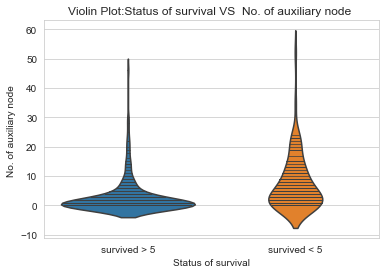

In [136]:
sns.violinplot(x='status',y='nodes', data=dataset,inner = 'stick' )
plt.ylabel("No. of auxiliary node ")
plt.xlabel("Status of survival")
plt.title("Violin Plot:Status of survival VS  No. of auxiliary node ")
plt.show()


### Observation:
    Violin plots are a synergism between box plot and density trace. So all the observation i.e. upper and lower    
    extreme, first , second and third quartile will be same as box plot.

  ####   ∆ density trace observation:
   #####    for plot status = 1 , i.e. who survived more than 5 year:
           Patient who has no. of node = 0,  more dense.
  ######    for plot status = 2 , i.e. who survived less than  5 year:
           Patient who has no. of node between 0 to 4 are more dense.


[0.73333333 0.10222222 0.02666667 0.05333333 0.01333333 0.00888889
 0.02222222 0.00444444 0.00888889 0.00888889 0.00444444 0.
 0.00444444 0.00444444 0.         0.         0.         0.
 0.         0.00444444]
[ 0.   2.3  4.6  6.9  9.2 11.5 13.8 16.1 18.4 20.7 23.  25.3 27.6 29.9
 32.2 34.5 36.8 39.1 41.4 43.7 46. ]
[0.39506173 0.17283951 0.0617284  0.08641975 0.04938272 0.08641975
 0.01234568 0.03703704 0.0617284  0.01234568 0.         0.
 0.         0.01234568 0.         0.         0.         0.
 0.         0.01234568]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


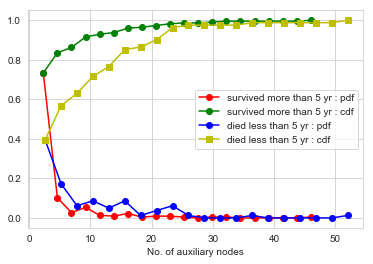

In [138]:
counts, bin_edges = np.histogram(dataset_survived['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,"ro-",label='survived more than 5 yr : pdf')
plt.plot(bin_edges[1:], cdf,"go-",label='survived more than 5 yr : cdf')


#plt.show();

#pdf and cdf

counts, bin_edges = np.histogram(dataset_died['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,"bo-",label='died less than 5 yr : pdf')
plt.plot(bin_edges[1:], cdf,"ys-",label='died less than 5 yr : cdf')
plt.legend()
plt.xlabel("No. of auxiliary nodes")

plt.show();

### Observation:
    ø node < 3 chances of survival >65% and death 30%
    ø node >3 and <= 5,  chances of survival = 15% and death 30%
    ø node > 45 , no patient survived more than 5 years


## Ques6 Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.

### § 1d scatter plot :  feature - age

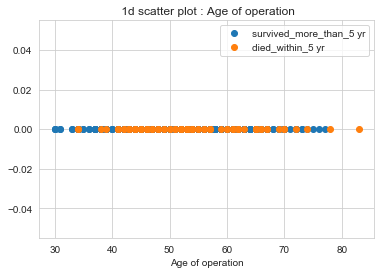

In [153]:

plt.plot(dataset_survived["age"], np.zeros_like(dataset_survived['age']), 'o',label='survived_more_than_5 yr')
plt.plot(dataset_died["age"], np.zeros_like(dataset_died['age']), 'o',label='died_within_5 yr')
plt.legend()
plt.xlabel("Age of operation")
plt.title(" 1d scatter plot : Age of operation")
plt.show()


### Observation: it is very difficult to analysis the point as they are overlapping a lot.

### § 1d scatter plot :  feature - year

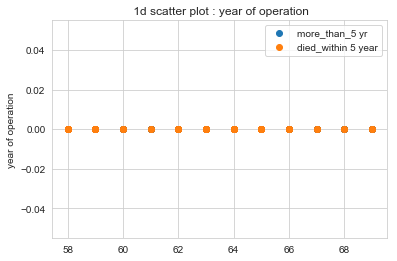

In [152]:
plt.plot(dataset_survived["year"], np.zeros_like(dataset_survived['year']), 'o',label='more_than_5 yr')
plt.plot(dataset_died["year"], np.zeros_like(dataset_died['year']), 'o',label='died_within 5 year')
plt.legend()
plt.ylabel("year of operation")
plt.title(" 1d scatter plot : year of operation")
plt.show()

### Observation: it is very difficult to analysis the point as they are overlapped .

### § 1d scatter plot :  feature - nodes

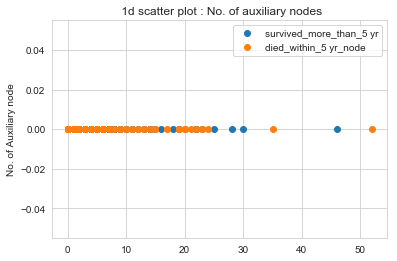

In [151]:

plt.plot(dataset_survived["nodes"], np.zeros_like(dataset_survived['nodes']), 'o',label='survived_more_than_5 yr')
plt.plot(dataset_died["nodes"], np.zeros_like(dataset_died['nodes']), 'o',label='died_within_5 yr_node')
plt.legend()
plt.ylabel("No. of Auxiliary node")
plt.title(" 1d scatter plot : No. of auxiliary nodes")
plt.show()

### Observation: it is very difficult to analysis the point as they are overlapping a lot.

### § 2D scatter plot: year vs age

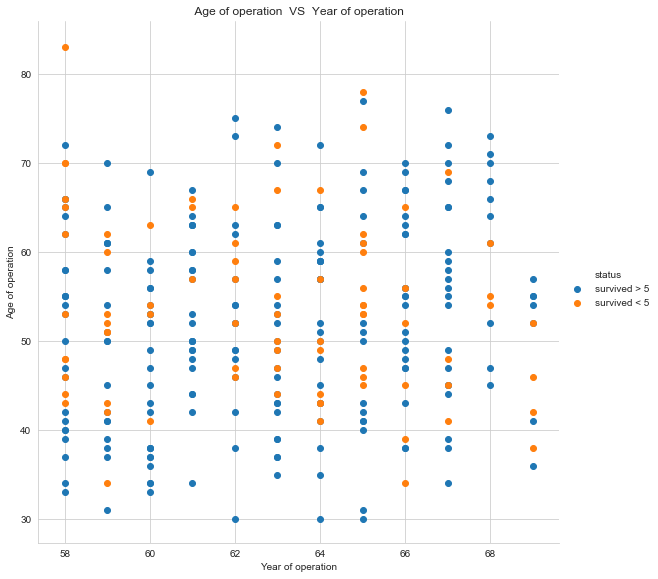

In [146]:
sns.set_style("whitegrid")
sns.FacetGrid(dataset, hue = "status" , height = 8  ) \
    .map(plt.scatter , "year","age") \
    .add_legend()
plt.xlabel("Year of operation")
plt.ylabel("Age of operation")
plt.title(" Age of operation  VS  Year of operation ")
plt.show()

### Observation: 
    From year vs age plot we can see that maximum patient age <=40 and operated between year 58 to 67 , 
    survived more than 5 year.

### § 2D scatter plot: age vs node

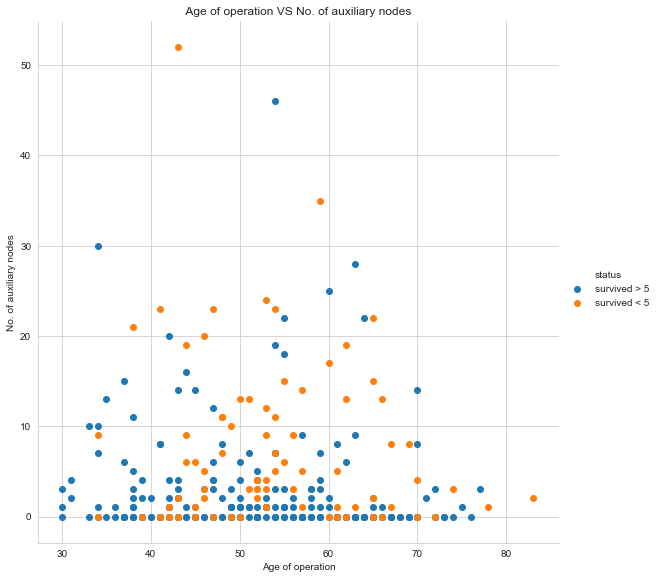

In [147]:
sns.set_style("whitegrid")
sns.FacetGrid(dataset, hue = "status" , height = 8) \
    .map(plt.scatter , "age","nodes") \
    .add_legend()
plt.xlabel("Age of operation")
plt.ylabel("No. of auxiliary nodes")
plt.title(" Age of operation VS No. of auxiliary nodes ")
plt.show()

### Observation: 
    From 2D scatter plot age vs nodes  ,
     1.we can see that most of the patients(age between 30 and 40) and node <= 10
       survived more than 5 year.
     2.most of the patients(age between 50 and 70) and node >=6 
       survived less than 5 year.

### § 2D scatter plot: nodes vs year

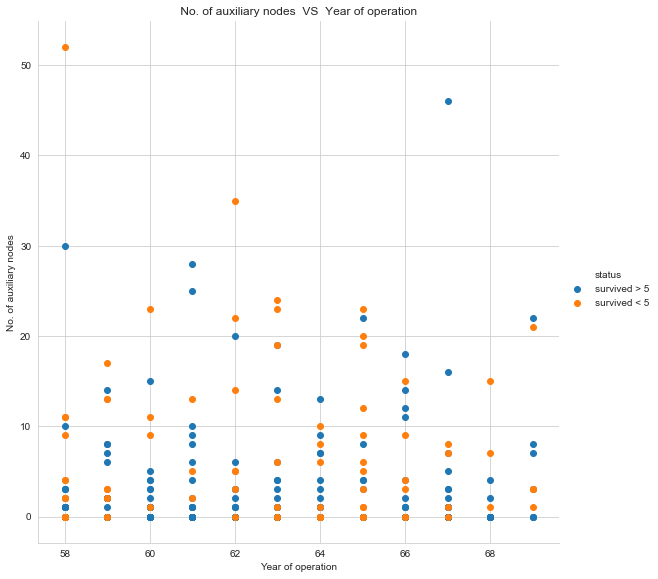

In [141]:
sns.set_style("whitegrid")
sns.FacetGrid(dataset, hue = "status" , height = 8) \
    .map(plt.scatter , "year","nodes") \
    .add_legend()
plt.xlabel("Year of operation")
plt.ylabel("No. of auxiliary nodes")
plt.title(" Year of operation VS No. of auxiliary nodes")
plt.show()

### Observation: 
    From above plot we can see that 
     1.maximum patient who had been operated between 60 to 62 year and  node < 10 ,survived more than 5 year.
     2.maximum patient who had been operated between 58 to 65 year and  node > 10 ,survived less than 5 year

### § Pair plot

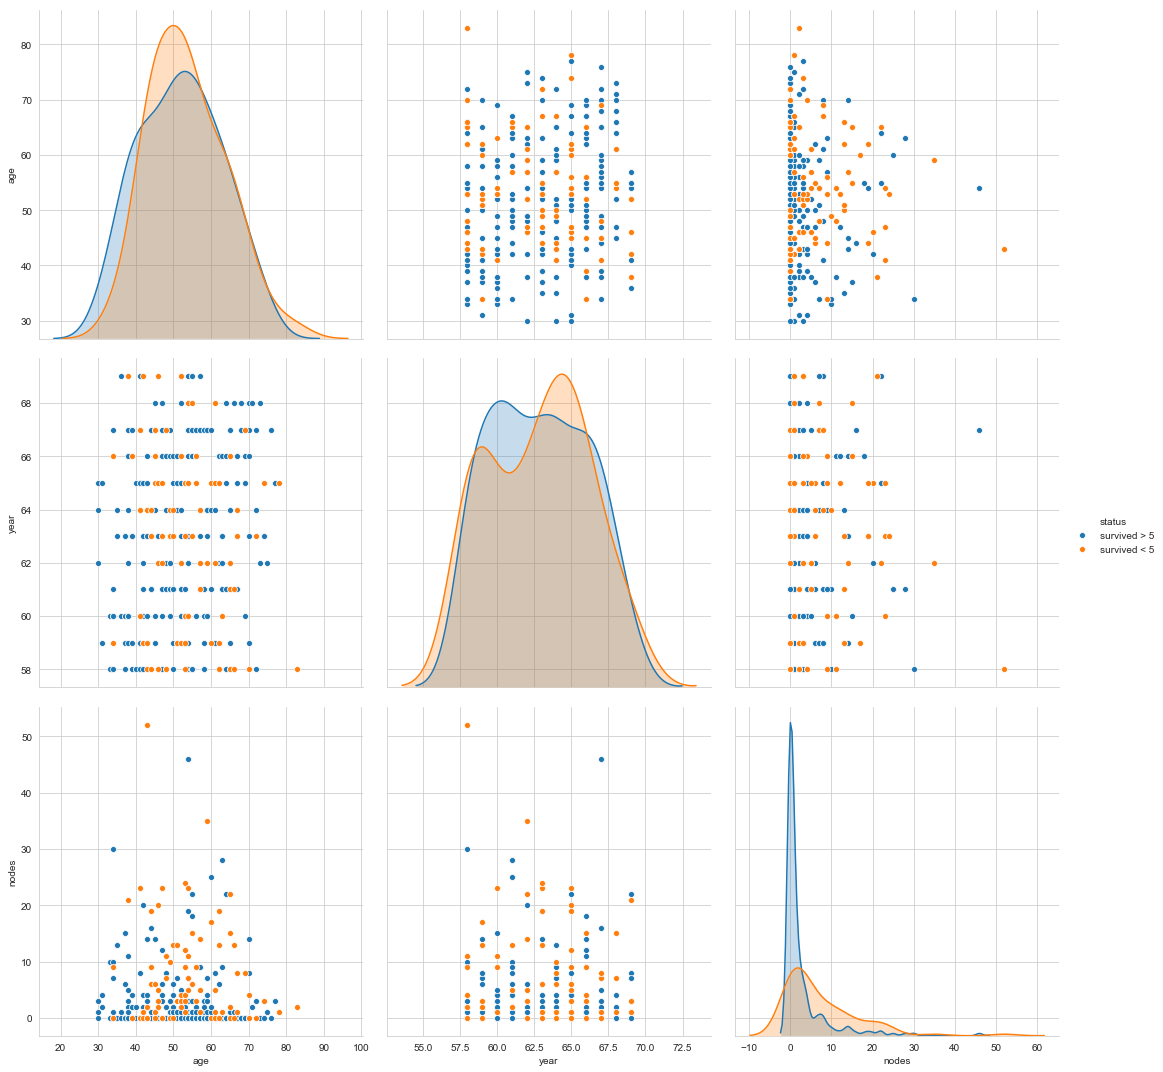

In [142]:
sns.pairplot(dataset, hue = "status", vars = ['age','year','nodes'], height = 5)

### Observation: 
       Above all the pair nodes vs age is easy to predict the patient survived more than 5 year.
       We can see that patient at the age between 30 and 40 and node <= 10 survived more than 5 year.
 
 #### ¥ from histogram :
      age and year are almost overlapping. So it is very difficult to predict.
      In case of node it is seen that if node = 0 , chances of survival is more.


##  Ques 7 Write your observations in english as crisply and unambigously as possible. Always                    quantify your results.

### Overall Observation: 
1. There are total 306 datapoints with 4 features.
2. patient who survived more than 5 year = 225 and patient who survived less than 5 year = 81. 
   So dataset is imbalanced.
3. Univariate analysis(PDF, CDF, Boxplot, Violin plots) 
   PDF and CDF for age and year feature are almost same for survived(more than 5 year) and 
   died(within 5 year) is more. than 5 year.If no of node is more than 45 , there is no chance of survival.
   
   • Boxplot: Patient who operated at the age between 30 to 40 , chances of survival is high .
              Patient who operated at the age more than 60, chances of survival is less.
              Patient who operated between year 65 to 66 , chances of survival is high.
              Patient who has no of nodes <= 3 , chances of survival is high.
   • Violin plot: Patient who operated at the age between 40 to 52 are more dense.
                Patient who operated between year 60 to 65.5 are more dense.
                Patient who has no of node between 0 to 4 are more dense.
                
4. Bi-variate analysis (scatter plots, pair-plots)

    • 1d scatter plot: Data points are almost overlapping. So it is very difficult to predict the status.
    • 2d scatter plot:most of the patients(age between 30 and 40) and node <= 10 and operated between year 60 to 62         are survived more than 5 years.
    • pair plot : node vs age is very useful to predict the status.
    

### References :

    1. referred the code related to plot from applied ai course: EDA.
    2. violin plot analysis: https://quantixed.org/wp-content/uploads/2014/12/hintze_1998.pdf.
    3. pdf and cdf analysis: https://github.com/gitskp/Haberman-s_Survival_Data_Set_-EDA/blob/master/Haberman_Cancer_Dataset_EDA.pdf.               
